In [1]:
import pandas as pd
import numpy as np
from numpy import matmul
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

In [3]:
headers = []
with open ("Datasets/communities.names.txt") as f:
        for line in f:
            split = line.split(',')[0].split(" ")
            if "@attribute" in split:
                headers.append(split[1])

In [4]:
df = pd.read_csv("Datasets/communities.data.txt", names=headers, na_values='?')

In [5]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


In [6]:
df_mean = df.copy()

In [7]:
for header in headers:
    if df[header].dtypes == np.float64 or df[header].dtypes == np.int64:
        df_mean[header].fillna(value=df_mean[header].mean(), inplace=True)

In [8]:
df.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


You could deal with missing values using listwise deletion, meaning you delete rows that have missing values. This however adds bias if the data is not completely random which is most likely the case with this dataset. Another implementation could be to replace missing values with the median value contained in the column. This approach is more beneficial if there are several outliers contained in the dataset. This can be seen to be true from the table seen above, where for several columns the max is well above 75% of the values in the column. This would mean that if we were to use the mean to replace missing values, we would have our missing values be skewed too far towards the outlier values.

In [9]:
df_median = df.copy()

In [10]:
for header in headers:
    if df[header].dtypes == np.float64:
        df_median[header].fillna(value=df_median[header].median(), inplace=True)

In [11]:
df_median.to_csv("./Datasets/Q4/clean_data_median.csv", header=False)
df.to_csv("./Datasets/Q4/clean_data_mean.csv", header=False)

In [12]:
np.random.seed(20)
for i in range(5):
    full_df = df_median.reindex(np.random.permutation(df.index)).drop(columns=["communityname", "state", "county", "fold", "community"])
    eighty_split = int(0.8*len(full_df) + 1)
    full_df[:eighty_split].to_csv("./Datasets/Q4/CandC-train"+str(i)+".csv")
    full_df[eighty_split:].to_csv("./Datasets/Q4/CandC-test"+str(i)+".csv")

In [13]:
def generate_weights(x_matrix, y_matrix):
    x_matrix_T = np.matrix.transpose(np.copy(x_matrix))
    w_matrix = matmul(matmul(inv(matmul(x_matrix_T,x_matrix)),x_matrix_T),y_matrix)
    return w_matrix

def mse(x, y, w):
    y_output = []
    for j in range(len(x)):
        row_output = np.dot(x[j], w)
        y_output.append(row_output)
    return np.mean((np.array(y_output) - np.array(y))**2)

In [14]:
import time

In [15]:
start = time.time()
total_mse = []
for i in range(5):
    train_data = pd.read_csv("./Datasets/Q4/CandC-train" + str(i) + ".csv")
    test_data = pd.read_csv("./Datasets/Q4/CandC-test" + str(i) + ".csv")
    # Train x and y
    x_train = train_data.as_matrix()[:,:-1]
    y_train = train_data.as_matrix()[:,-1]
    
    # Bias term for Wo
    bias = np.ones((np.shape(x_train)[0],1))
    x_train = np.append(bias, x_train, axis=1)
    
    # Test x and y
    x_test = test_data.as_matrix()[:,:-1]
    x_test = np.append(bias[:len(x_test)], x_test, axis=1)
    y_test = test_data.as_matrix()[:,-1]
    
    w_vector = generate_weights(x_train, y_train)
    total_mse.append(("MSE for dataset " + str(i) + ": ", mse(x_test, y_test, w_vector)))
end = time.time()

for i in total_mse:
    print(i[0], i[1])
if len(total_mse) > 0:
    vals = [i[1] for i in total_mse]
    print("Cross validation error: ", sum(vals)/len(vals))
print(end-start)

MSE for dataset 0:  0.01950768144604481
MSE for dataset 1:  0.02020740860204823
MSE for dataset 2:  0.0196867358027154
MSE for dataset 3:  0.016152662158805713
MSE for dataset 4:  0.017333524433336
Cross validation error:  0.01857760248859003
1.1343531608581543


#### 4.3 Ridge Regression:

In [16]:
def generate_regularized_weights(x_matrix, y_matrix, l):
    x_matrix_T = np.matrix.transpose(np.copy(x_matrix))
    w_matrix = matmul(matmul(inv(matmul(x_matrix_T,x_matrix) + l*np.eye(np.shape(x_matrix)[1])),x_matrix_T),y_matrix)
    return w_matrix

In [30]:
def test_lambdas(start=1e-3, end=70, iterations=100):
    lambdas = np.linspace(start, end, iterations)
    lambda_mse = []
    for l in lambdas:
        total_mse = []
        for i in range(5):
            train_data = pd.read_csv("./Datasets/Q4/CandC-train" + str(i) + ".csv")
            test_data = pd.read_csv("./Datasets/Q4/CandC-test" + str(i) + ".csv")
            # Train x and y
            x_train = train_data.as_matrix()[:,:-1]
            y_train = train_data.as_matrix()[:,-1]
            
            # Bias term for Wo
            bias = np.ones((np.shape(x_train)[0],1))
            x_train = np.append(bias, x_train, axis=1)
            
            # Test x and y
            x_test = test_data.as_matrix()[:,:-1]
            x_test = np.append(bias[:len(x_test)], x_test, axis=1)
            y_test = test_data.as_matrix()[:,-1]

            w_vector = generate_regularized_weights(x_train, y_train, l)
            total_mse.append(mse(x_test, y_test, w_vector))
        lambda_mse.append([l, np.mean(total_mse), w_vector])
    return lambda_mse

In [32]:
x_axis, y_axis,_ = zip(*test_lambdas(1e-3, 70, 100))

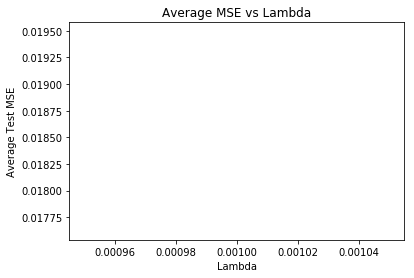

In [34]:
plt.plot(x_axis, y_axis)
plt.xlabel("Lambda")
plt.ylabel("Average Test MSE")
plt.title("Average MSE vs Lambda")
plt.show()

In [38]:
vals = test_lambdas(1e-3, 70, 10)
for i in vals:
    print("Lambda: ", i[0], ", Average MSE: ", i[1], ", Parameters: ", i[2])
    print("\n")

Lambda:  0.001 , Average MSE:  0.018558599348873647 , Parameters:  [ 1.49785590e+00 -8.65479256e-06  4.24542722e-01 -1.52560699e-02
  1.51452909e-01 -5.98664396e-02 -3.45599414e-02  7.85135466e-02
  1.63868536e-01 -2.69098224e-01 -1.64014332e-01 -1.08012936e-02
 -4.78825180e-01  6.02143456e-02 -2.16971152e-01 -1.68958209e-01
  4.96391869e-02 -1.80852312e-01  1.37395060e-01  4.13003071e-02
 -1.16720597e-01  2.43978181e-01  6.65793579e-02 -3.32358174e-01
 -2.87968487e-02 -3.75868000e-02  7.24241419e-03  2.66554683e-02
  6.11731814e-02  2.88430698e-02 -2.28406368e-01 -1.30232022e-01
  3.08952418e-02  6.49818340e-02 -2.33593538e-04  2.15346387e-01
 -7.08954564e-02 -5.11318279e-02  1.19398870e-01  1.66778722e-01
  3.56056001e-01  2.25465002e-01  5.53489812e-02 -4.04759085e-01
 -1.29203602e-01  6.01972630e-02 -4.22103605e-01 -1.76010992e-03
  6.11639338e-03  2.80878318e-02 -1.66061371e-01 -5.53352915e-02
  1.34155357e-01 -1.58163880e-01  5.98963767e-02 -3.71824222e-02
 -2.18476675e-02  2.839

It can be clearly seen in the image above, that there is in fact a minimum that occurs, we will plot again and expand closer to the point to find our best value of lambda

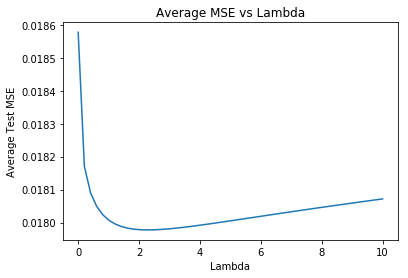

In [20]:
x_axis, y_axis = zip(*test_lambdas(0, 10, 50))
plt.plot(x_axis, y_axis)
plt.xlabel("Lambda")
plt.ylabel("Average Test MSE")
plt.title("Average MSE vs Lambda")
plt.show()

In [21]:
y_axis.index(min(y_axis))

11

In [22]:
x_axis[11]

2.2448979591836737

Lowest value of lambda is measured to be <b>2.24490</b>

In [23]:
start = time.time()
total_mse = []
for i in range(5):
    train_data = pd.read_csv("./Datasets/Q4/CandC-train" + str(i) + ".csv")
    test_data = pd.read_csv("./Datasets/Q4/CandC-test" + str(i) + ".csv")
    # Train x and y
    x_train = train_data.as_matrix()[:,:-1]
    y_train = train_data.as_matrix()[:,-1]
    
    # Bias term for Wo
    bias = np.ones((np.shape(x_train)[0],1))
    x_train = np.append(bias, x_train, axis=1)
    
    # Test x and y
    x_test = test_data.as_matrix()[:,:-1]
    x_test = np.append(bias[:len(x_test)], x_test, axis=1)
    y_test = test_data.as_matrix()[:,-1]
    
    w_vector = generate_regularized_weights(x_train, y_train, 2.2448979591836737)
    total_mse.append(("MSE for dataset " + str(i) + ": ", mse(x_test, y_test, w_vector)))
    
end = time.time()
for i in total_mse:
    print(i[0], i[1])
if len(total_mse) > 0:
    vals = [i[1] for i in total_mse]
    print("Cross validation error: ", sum(vals)/len(vals))
print(end-start)

MSE for dataset 0:  0.018559657667666422
MSE for dataset 1:  0.019077015718677277
MSE for dataset 2:  0.018551356401263482
MSE for dataset 3:  0.01626097831548251
MSE for dataset 4:  0.017438674355213506
Cross validation error:  0.017977536491660638
0.5346941947937012


To increase our accuracy we will drop weights that are close to or almost zero, to do this, we will drop the bottom 40 features, this means that all of the 40 minimum weights will be set to zero and in effect those features will not impact the model.

In [24]:
def drop_weights(weights):
    drop_indices = []
    i = 0
    sorted_weights = sorted(weights, key=lambda x: abs(x))
    w = list(weights)
    for i in range(40):
        drop_indices.append(w.index(sorted_weights[i]))
        
    return sorted(drop_indices)

In [25]:
total_mse = []
for i in range(5):
    train_data = pd.read_csv("./Datasets/Q4/CandC-train" + str(i) + ".csv")
    test_data = pd.read_csv("./Datasets/Q4/CandC-test" + str(i) + ".csv")
    # Train x and y
    x_train = train_data.as_matrix()[:,:-1]
    y_train = train_data.as_matrix()[:,-1]
    
    # Bias term for Wo
    bias = np.ones((np.shape(x_train)[0],1))
    x_train = np.append(bias, x_train, axis=1)
    
    # Test x and y
    x_test = test_data.as_matrix()[:,:-1]
    x_test = np.append(bias[:len(x_test)], x_test, axis=1)
    y_test = test_data.as_matrix()[:,-1]
    
    w_vector = generate_regularized_weights(x_train, y_train, 2.2448979591836737)
    drop_indices = drop_weights(w_vector)
    w_vector = np.delete(w_vector, drop_indices)
    x_test = np.delete(x_test, drop_indices, axis=1)
    total_mse.append(("MSE for dataset " + str(i) + ": ", mse(x_test, y_test, w_vector)))

for i in total_mse:
    print(i[0], i[1])
if len(total_mse) > 0:
    vals = [i[1] for i in total_mse]
    print("Cross validation error: ", sum(vals)/len(vals))

MSE for dataset 0:  0.01946831981888337
MSE for dataset 1:  0.02134375256119317
MSE for dataset 2:  0.018836575631067998
MSE for dataset 3:  0.018911482176249834
MSE for dataset 4:  0.017943304395826743
Cross validation error:  0.019300686916644223
